In [24]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

df = pd.read_csv('vehicles.csv')

In [25]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [26]:
df.shape


(51525, 13)

In [27]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [28]:

df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [29]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [30]:
df.isnull().sum() 

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [31]:
df = df.dropna() 

In [32]:
df.isnull().sum() 

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [33]:
df.count()

price           14852
model_year      14852
model           14852
condition       14852
cylinders       14852
fuel            14852
odometer        14852
transmission    14852
type            14852
paint_color     14852
is_4wd          14852
date_posted     14852
days_listed     14852
dtype: int64

In [34]:
df.drop_duplicates(inplace=True)


In [35]:
df.count()


price           14852
model_year      14852
model           14852
condition       14852
cylinders       14852
fuel            14852
odometer        14852
transmission    14852
type            14852
paint_color     14852
is_4wd          14852
date_posted     14852
days_listed     14852
dtype: int64

In [36]:
df['paint_color']

5         black
7         black
10        black
14        black
16          red
          ...  
51494    silver
51500     white
51509     white
51513     white
51515    silver
Name: paint_color, Length: 14852, dtype: object

In [37]:
df['paint_color'].fillna('Unknown', inplace=True)


In [38]:
df.isnull().sum() 


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [39]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [40]:
df.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import numpy as np

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'model_year'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'is_4wd'}>,
        <AxesSubplot:title={'center':'date_posted'}>],
       [<AxesSubplot:title={'center':'days_listed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

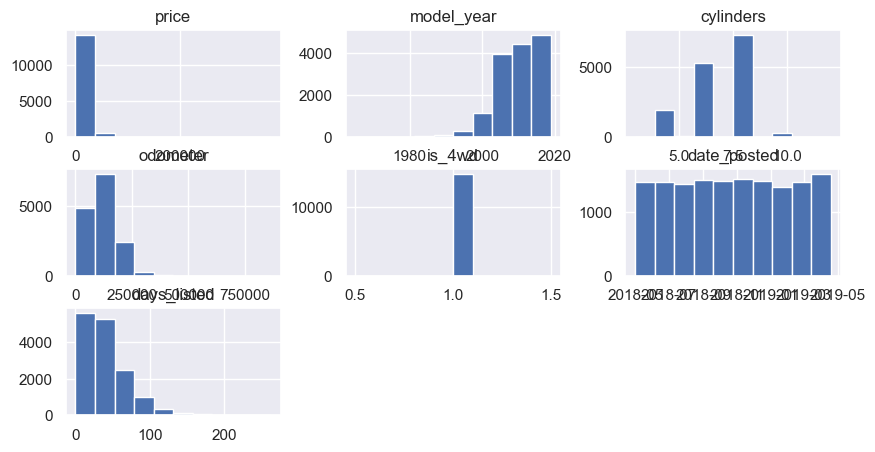

In [42]:

df.hist(figsize=(10,5))

<AxesSubplot:xlabel='price'>

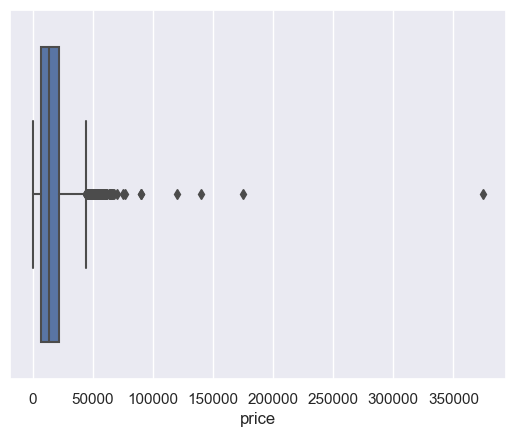

In [44]:
sns.boxplot(x=df['price'])



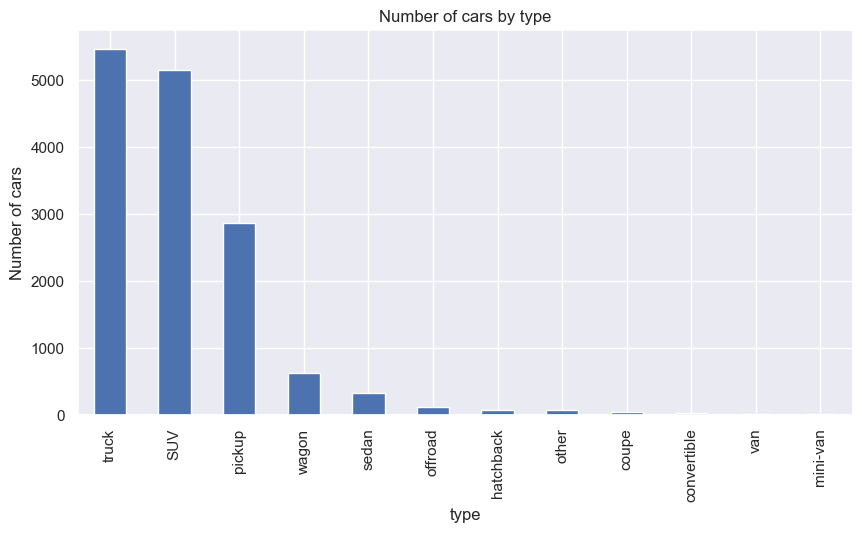

In [46]:
# Plotting a Histogram for number of cars per type
df.type.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by type")
plt.ylabel("Number of cars")
plt.xlabel("type");

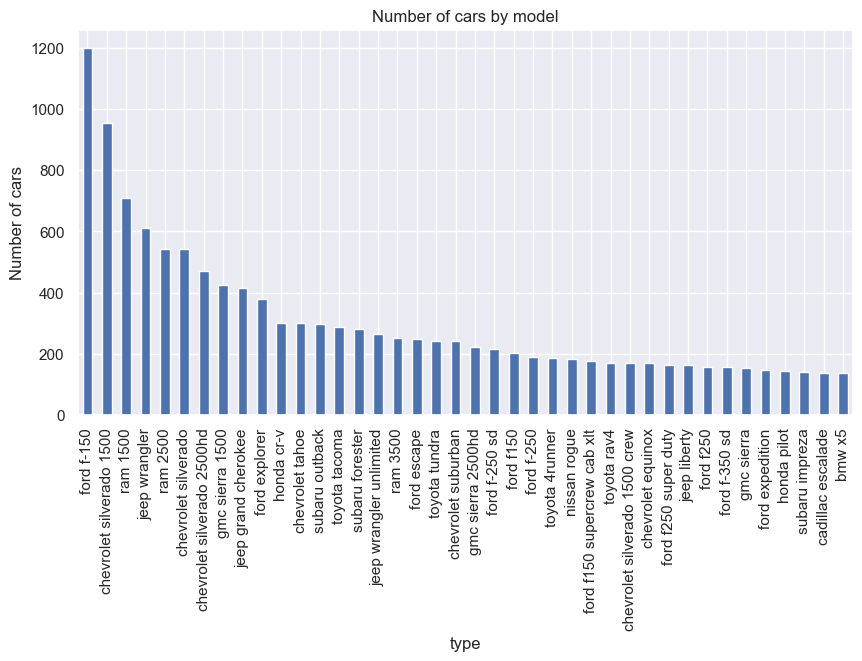

In [47]:
# Plotting a Histogram for number of cars per model
df.model.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by model")
plt.ylabel("Number of cars")
plt.xlabel("type");

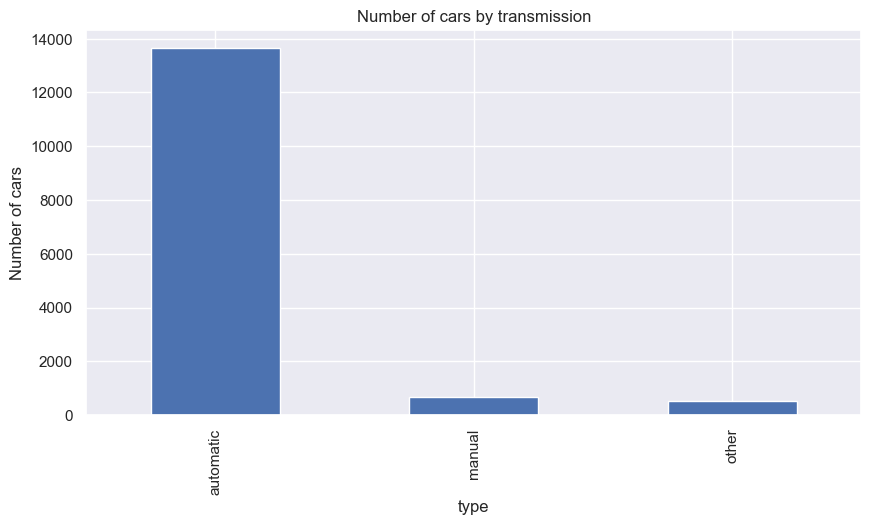

In [48]:
# Plotting a Histogram for number of cars per transmission
df.transmission.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by transmission")
plt.ylabel("Number of cars")
plt.xlabel("type");


,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.570872,0.142674,-0.470753,NaN,-0.008667
model_year,0.570872,1.000000,-0.062516,-0.599515,NaN,-0.006680
cylinders,0.142674,-0.062516,1.000000,0.072150,NaN,-0.001291
odometer,-0.470753,-0.599515,0.072150,1.000000,NaN,0.011420
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.008667,-0.006680,-0.001291,0.011420,NaN,1.000000


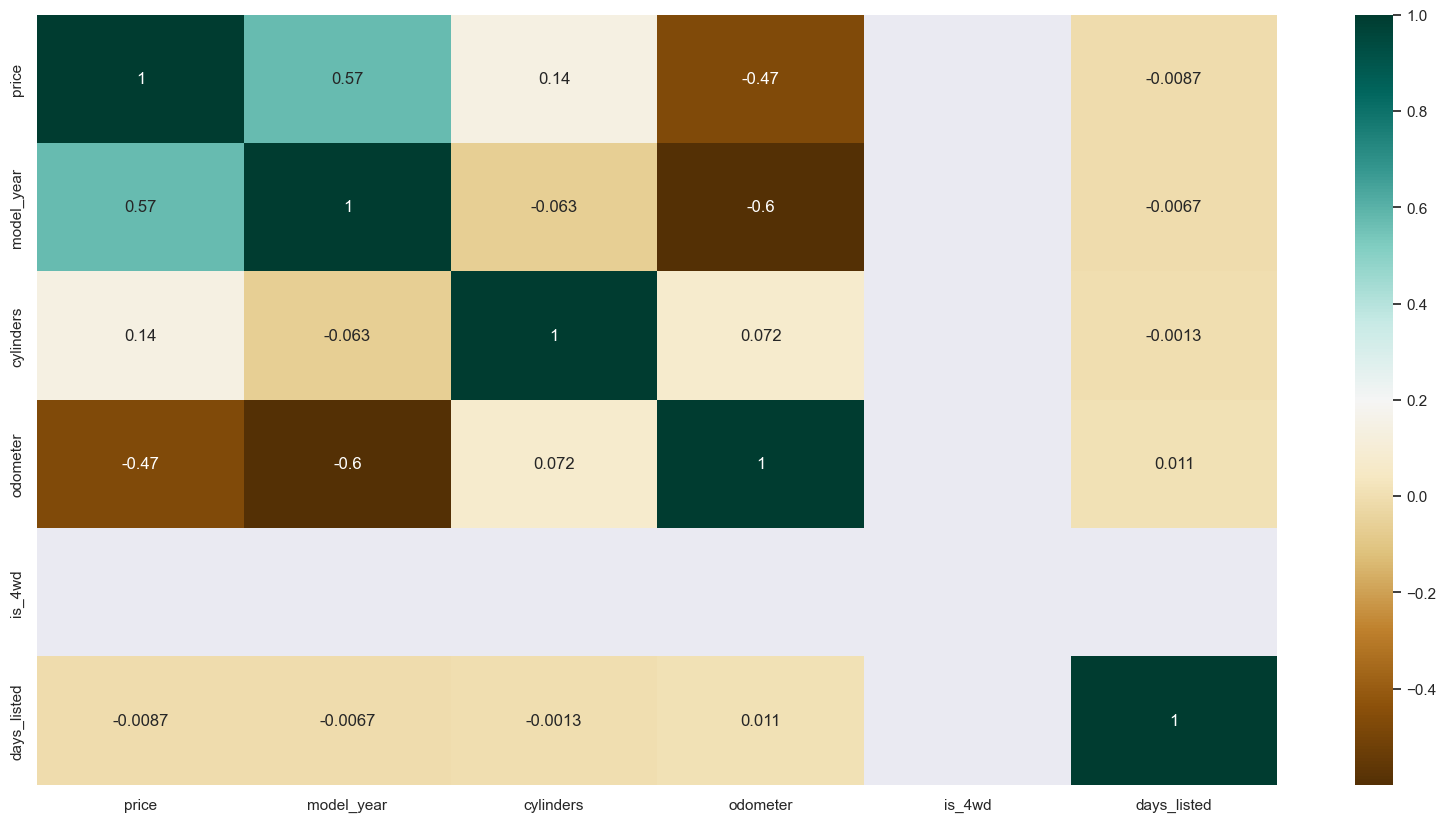

In [49]:
# Find the relations between the variables.
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
corr

In [50]:
cat_totals = df.groupby("transmission")["price"].sum().sort_values()


In [51]:
print(cat_totals)

transmission
manual         7780207
other          8413328
automatic    213224138
Name: price, dtype: int64


In [53]:
cat_totals_condition = df.groupby("condition")["price"].sum().sort_values()


In [54]:
print(cat_totals_condition )

condition
salvage         121875
new            1660439
fair           1741778
like new      29162544
good          76310562
excellent    120420475
Name: price, dtype: int64


<AxesSubplot:ylabel='condition'>

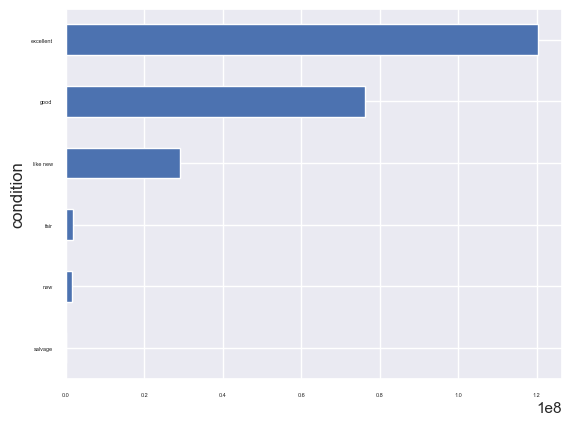

In [59]:
cat_totals_condition.plot(kind="barh", fontsize=4)

In [60]:
cat_totals_fuel = df.groupby("fuel")["price"].sum().sort_values()


<AxesSubplot:xlabel='fuel'>

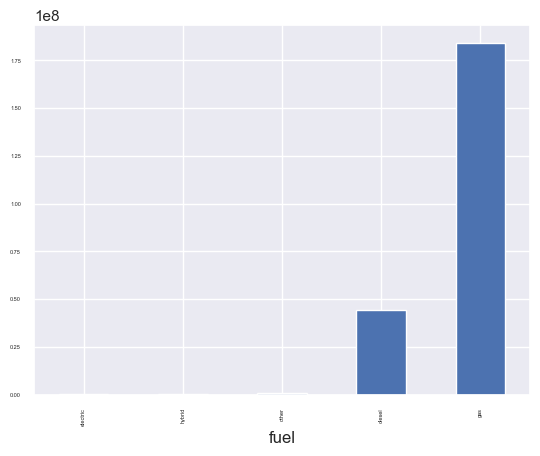

In [61]:
cat_totals_fuel.plot(kind="bar", fontsize=4)